# Telco Customer Churn

### Created By: Muhammad Syahirul Alim

## Business Problem Understanding

Perusahaan telekomunikasi ini berkomitmen untuk meningkatkan kualitas layanan demi mempertahankan pelanggan setia. Untuk mewujudkan tujuan ini, perusahaan ingin mengidentifikasi pelanggan yang berpotensi meninggalkan layanan mereka (churn) berdasarkan analisis data yang tersedia. Melalui pendekatan ini, perusahaan berharap dapat mengimplementasikan strategi yang efektif untuk meningkatkan kepuasan dan retensi pelanggan.

Target :

0 : Tidak Churn

1 : Churn

### Problem Statement

Biaya pemasaran merupakan bagian penting dari anggaran perusahaan. Alokasi yang cerdas diperlukan untuk menargetkan pelanggan yang tepat. Jika biaya dialokasikan untuk mempertahankan pelanggan yang tetap melakukan churn, itu menjadi penggunaan anggaran yang tidak efisien. Sebaliknya, jika biaya tidak dialokasikan kepada pelanggan yang berisiko churn, investasi pemasaran awal juga menjadi sia-sia. Analisis yang mendalam diperlukan untuk mengarahkan anggaran pemasaran dengan cerdas, mencapai tujuan mempertahankan pelanggan dengan biaya yang seefisien mungkin.

### Goals

Kita akan melakukan analisis untuk menemukan pola perilaku yang mengindikasikan kecenderungan customer untuk churn atau tidak. Selanjutnya, kami akan membuat model klasifikasi yang dapat memprediksi probabilitas seorang customer akan atau tidak akan melakukan churn.

### Analytic Approach

Kami akan melakukan analisis untuk mengidentifikasi pola perilaku yang menandakan kecenderungan customer untuk melakukan churn atau tetap setia. Selanjutnya, kami akan mengembangkan model klasifikasi yang dapat membantu perusahaan dalam memprediksi probabilitas seorang customer akan atau tidak akan melakukan churn.

### Metric Evaluation

Type 1 error : False Positive
Konsekuensi: biaya marketing yang sia-sia.

Type 2 error : False Negative
Konsekuensi: kehilangan customer.

Berdasarkan konsekuensinya, False Negative memiliki dampak yang lebih merugikan dibandingkan dengan False Positive. Hal ini disebabkan oleh biaya pemasaran yang tinggi untuk mendapatkan customer baru. Oleh karena itu, kehilangan customer berarti biaya pemasaran yang telah dikeluarkan untuk mendapatkan customer tersebut menjadi sia-sia.

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import warnings
import shap

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy.stats import shapiro, probplot

# Data Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from category_encoders import BinaryEncoder, OrdinalEncoder

# Sampling Methods for Imbalanced Data
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline

# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, 
                             ConfusionMatrixDisplay,RocCurveDisplay,classification_report,roc_auc_score)

# Miscellaneous Settings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Data Understanding

In [2]:
ket_kolom = pd.DataFrame({   
    'Kolom'       : [ 'Dependents','Tenure','OnlineSecurity','OnlineBackup',
                        'InternetService','DeviceProtection','TechSupport','Contract','PaperlessBilling',
                        'MonthlyCharges','Churn'],
    'Keterangan'    : [ 'Apakah pelanggan memiliki tanggungan atau tidak',
                        'Jumlah bulan pelanggan telah bergabung dengan perusahaan',
                        'Apakah pelanggan memiliki keamanan online atau tidak',
                        'Apakah pelanggan memiliki cadangan online atau tidak',
                        'Apakah pelanggan berlangganan layanan internet',
                        'Apakah customer memiliki device protection atau tidak',
                        'Apakah customer memilki tech support atau tidak',
                        'Jenis kontrak berdasarkan durasi',
                        'Apakah customer memiliki paperless billing',
                        'Jumlah biaya layanan per bulan ($)',
                        'Apakah pelanggan berhenti berlangganan atau tidak']
})

ket_kolom

,Kolom,Keterangan
0,Dependents,Apakah pelanggan memiliki tanggungan atau tidak
1,Tenure,Jumlah bulan pelanggan telah bergabung dengan ...
2,OnlineSecurity,Apakah pelanggan memiliki keamanan online atau...
3,OnlineBackup,Apakah pelanggan memiliki cadangan online atau...
4,InternetService,Apakah pelanggan berlangganan layanan internet
5,DeviceProtection,Apakah customer memiliki device protection ata...
6,TechSupport,Apakah customer memilki tech support atau tidak
7,Contract,Jenis kontrak berdasarkan durasi
8,PaperlessBilling,Apakah customer memiliki paperless billing
9,MonthlyCharges,Jumlah biaya layanan per bulan ($)


In [3]:
df=pd.read_csv('data_telco_customer_churn.csv')
df.head(5)

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


## Splitting Data I

In [4]:
# data splitting
df_train,df_test=train_test_split(df,test_size=0.3,random_state=10)
df_train

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
4393,Yes,53,Yes,Yes,DSL,No,Yes,One year,No,62.85,No
3736,No,42,No,No,DSL,Yes,Yes,Two year,Yes,78.45,No
1081,No,23,No,No,Fiber optic,No,No,Month-to-month,Yes,74.95,Yes
120,No,7,No,No,Fiber optic,Yes,No,Month-to-month,Yes,74.90,No
3232,No,2,No,No,Fiber optic,No,No,Month-to-month,No,68.95,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1180,Yes,34,No,No,Fiber optic,No,No,Month-to-month,No,78.30,Yes
3441,No,12,No,No,Fiber optic,No,No,Month-to-month,No,94.55,No
1344,No,1,No,No,DSL,No,No,Month-to-month,No,50.75,No
4623,No,58,No,Yes,DSL,Yes,No,Month-to-month,Yes,45.30,Yes


## Descriptive Statistic

In [5]:
df_train.select_dtypes(include='object').describe()

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,3451,3451,3451,3451,3451,3451,3451,3451,3451
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,2407,1690,1528,1532,1517,1718,1902,2071,2537


In [6]:
df_train.describe(include='number')

,tenure,MonthlyCharges
count,3451.000000,3451.000000
mean,32.657780,65.105535
std,24.536816,30.068136
min,0.000000,18.800000
25%,9.000000,36.275000
50%,29.000000,70.800000
75%,56.000000,90.100000
max,72.000000,118.600000


In [7]:
df_train.describe(exclude='number')

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,3451,3451,3451,3451,3451,3451,3451,3451,3451
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,2407,1690,1528,1532,1517,1718,1902,2071,2537


In [8]:
df_train.describe(exclude='number').columns

Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'Churn'],
      dtype='object')

## Normality Test for Numerical

In [9]:
from scipy.stats import normaltest

# Apply normaltest to each column and collect the p-values
normality_results = df_train.select_dtypes(include='number').apply(lambda col: normaltest(col.dropna())[1]).reset_index()

# Rename columns
normality_results.columns = ['Column', 'p-value']

# Print the result
normality_results

,Column,p-value
0,tenure,0.0
1,MonthlyCharges,0.0


In [10]:
normality_results[normality_results['p-value']<=0.05]['Column'].unique()

array(['tenure', 'MonthlyCharges'], dtype=object)

Data untuk fitur tenure dan MonthlyCharges tidak berdistribusi normal, seperti yang ditunjukkan p-value kurang dari 0.05.

## EDA (Exploratory Data Anlysis

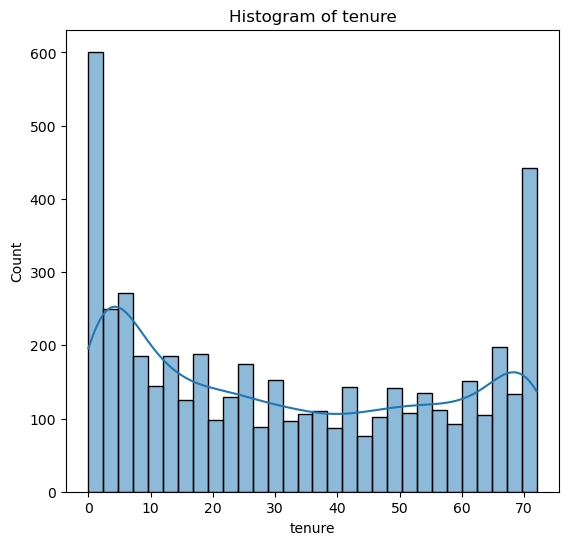

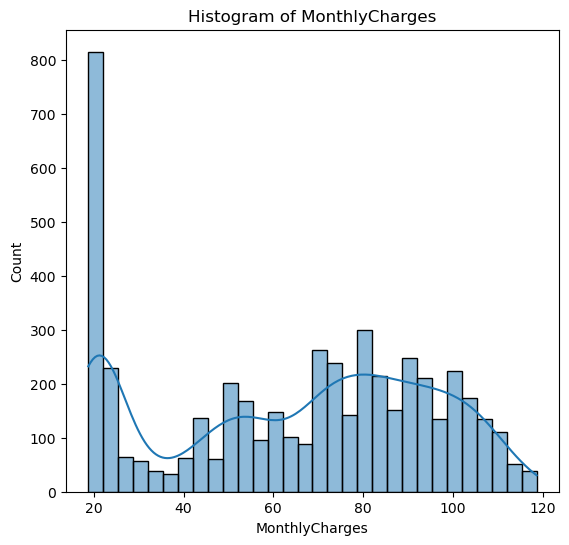

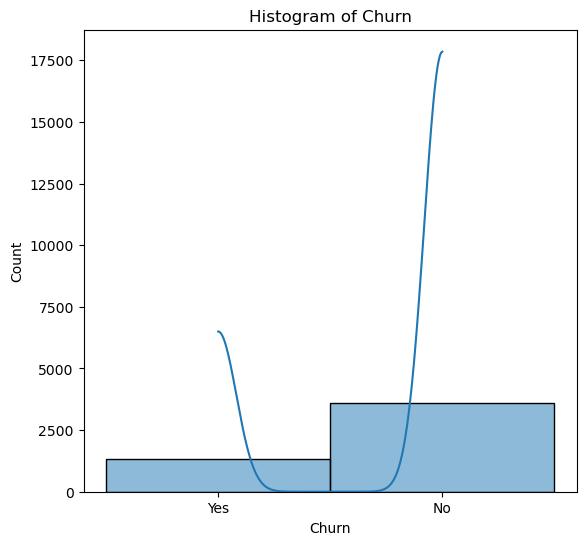

In [11]:
numerical_columns = ['tenure', 'MonthlyCharges', 'Churn']

# Loop untuk menghasilkan histogram dan boxplot untuk setiap kolom
for column in numerical_columns:
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')

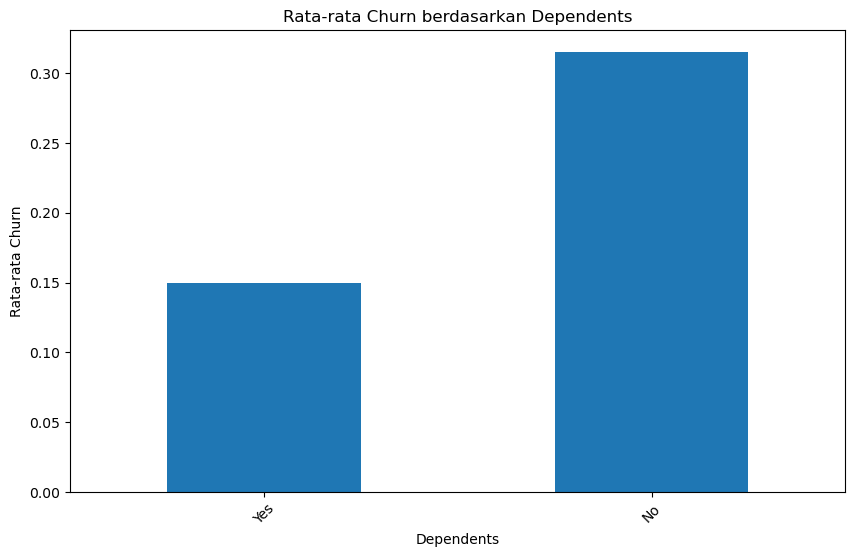

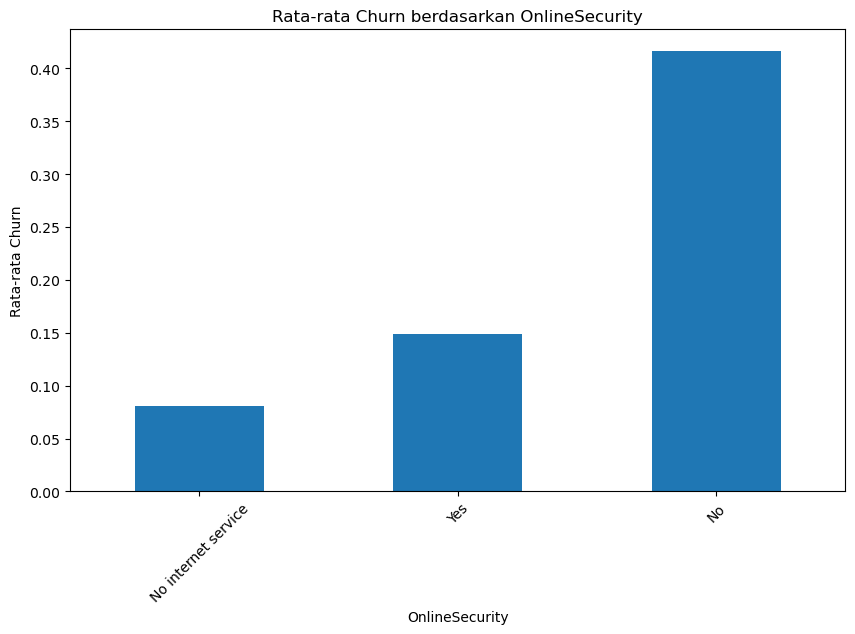

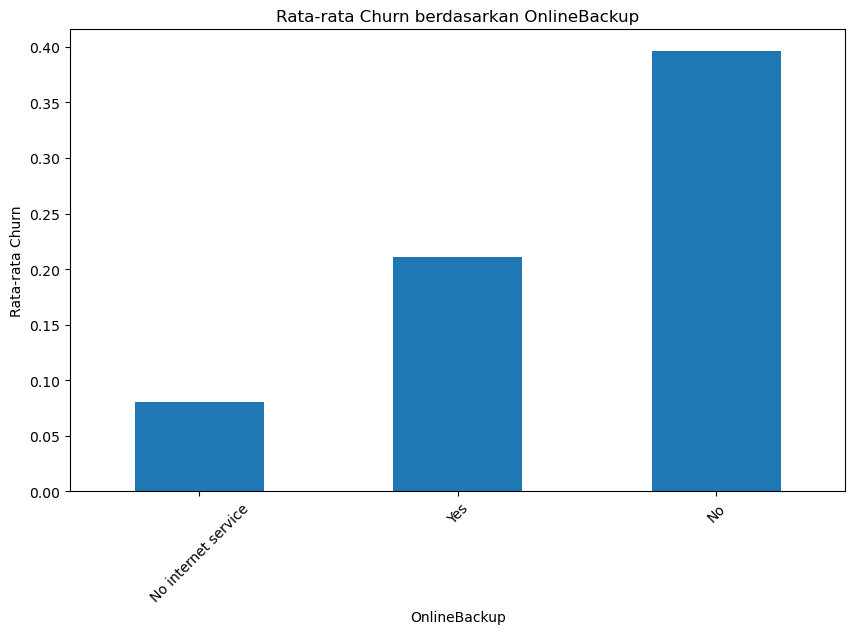

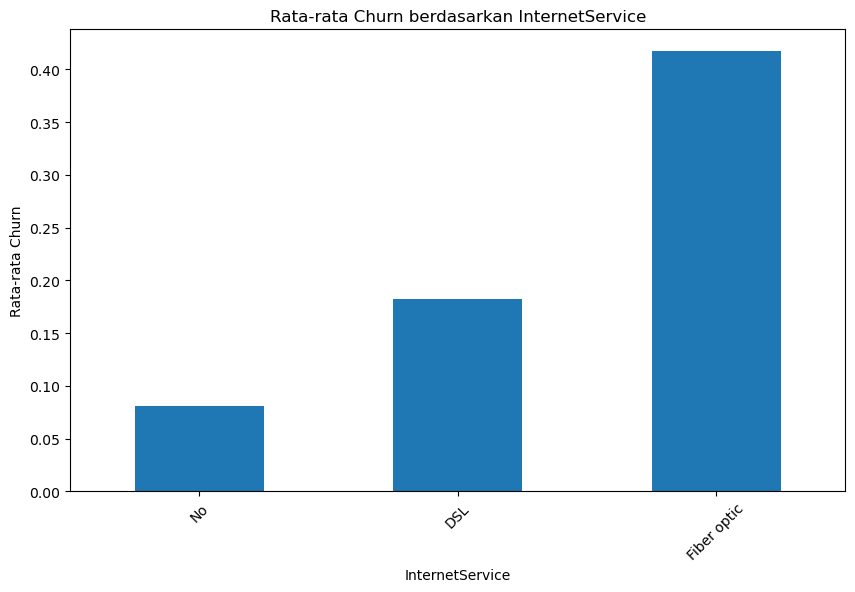

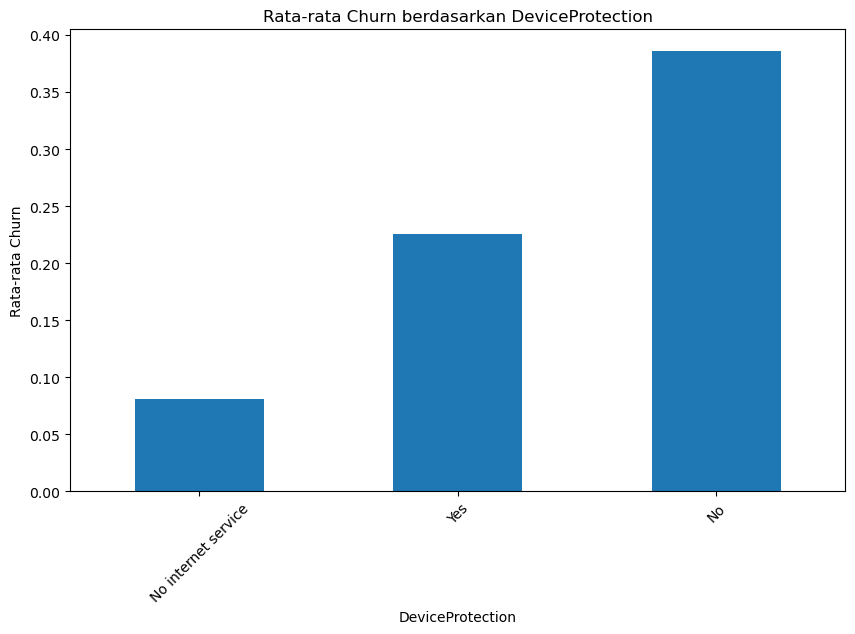

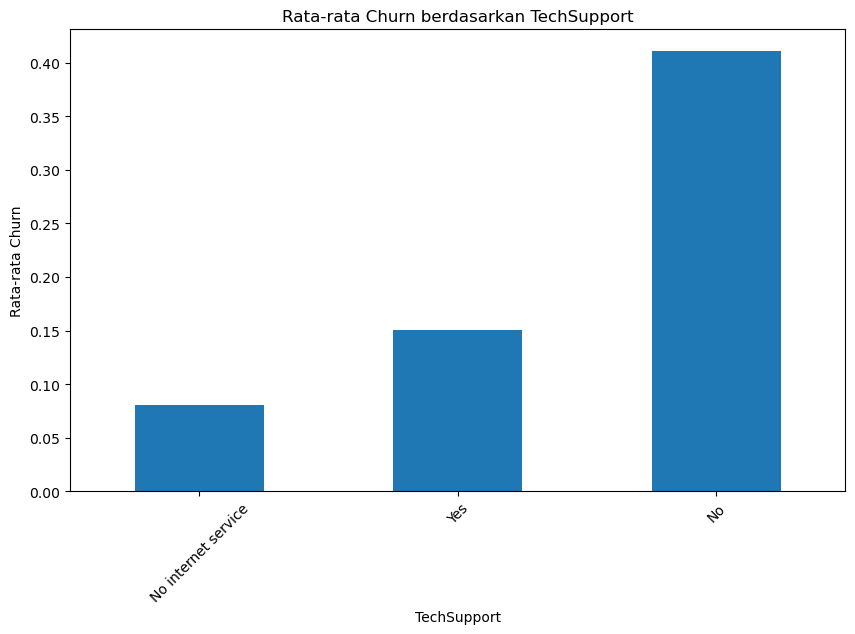

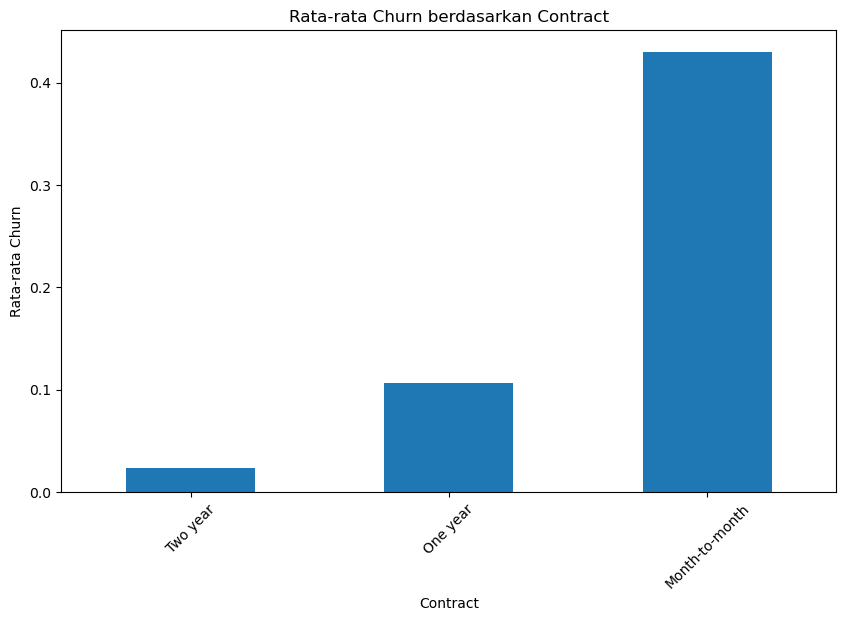

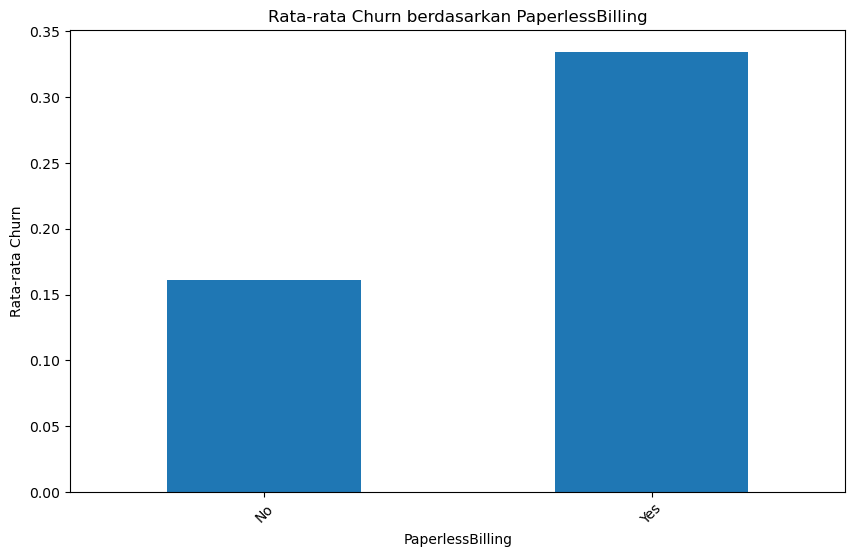

In [12]:
df_train['Churn'] = df_train['Churn'].map({'Yes': 1, 'No': 0})

# Asumsikan df_train adalah DataFrame Anda dan kolom CLV adalah Customer Lifetime Value
categoric_columns = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
                     'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']

# Menghitung dan membuat barplot untuk setiap kolom kategorik
for col in categoric_columns:
    plt.figure(figsize=(10, 6))
    # Menghitung rata-rata nilai Churn untuk setiap kategori
    mean_churn = df_train.groupby(col)['Churn'].mean().sort_values()
    # Membuat barplot
    mean_churn.plot(kind='bar')
    plt.title(f'Rata-rata Churn berdasarkan {col}')
    plt.ylabel('Rata-rata Churn')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

## Multicolinearity

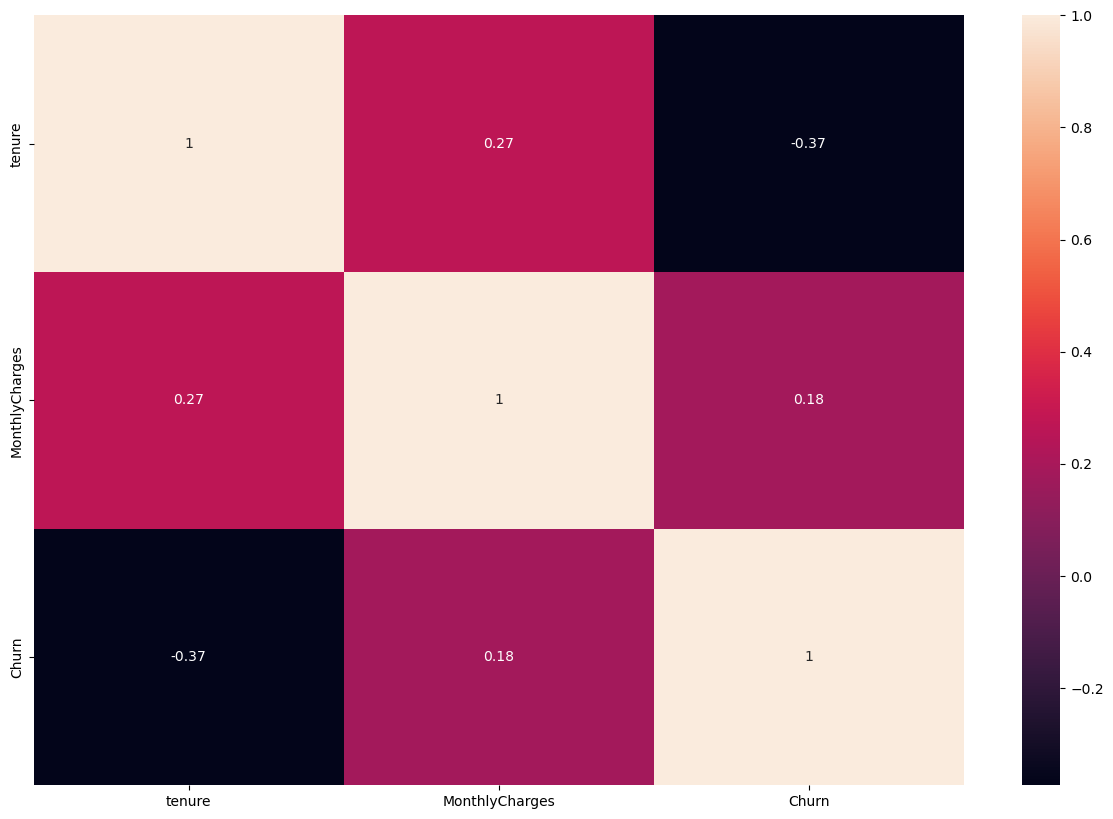

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.select_dtypes(include='number').corr(method='spearman'),annot=True)
plt.show()

Dari heatmap korelasi menggunakan metode Spearman, terlihat bahwa tenure memiliki korelasi negatif yang signifikan dengan churn (-0.37), menunjukkan bahwa semakin lama pelanggan berlangganan, semakin kecil kemungkinan mereka untuk churn. Sebaliknya, MonthlyCharges memiliki korelasi positif lemah dengan churn (0.18), menunjukkan bahwa pelanggan dengan biaya bulanan lebih tinggi sedikit lebih mungkin untuk churn. Korelasi lemah antara tenure dan MonthlyCharges (0.27) menunjukkan bahwa pelanggan jangka panjang cenderung memiliki biaya bulanan sedikit lebih tinggi.

In [14]:
dfcorr=df_train.select_dtypes(include='number')
corrMatrix=dfcorr.corr(method='spearman')
already_in = set()
result = []
for col in corrMatrix:
    large_corr = corrMatrix[col][corrMatrix[col] >= 0.6 ].index.tolist()
    if large_corr and col not in already_in:
        already_in.update(set(large_corr))
        large_corr.append(col)
        result.append(large_corr)

result

[['tenure', 'tenure'],
 ['MonthlyCharges', 'MonthlyCharges'],
 ['Churn', 'Churn']]

### Handling Missing Value & Data Type Check

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3451 entries, 4393 to 1289
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        3451 non-null   object 
 1   tenure            3451 non-null   int64  
 2   OnlineSecurity    3451 non-null   object 
 3   OnlineBackup      3451 non-null   object 
 4   InternetService   3451 non-null   object 
 5   DeviceProtection  3451 non-null   object 
 6   TechSupport       3451 non-null   object 
 7   Contract          3451 non-null   object 
 8   PaperlessBilling  3451 non-null   object 
 9   MonthlyCharges    3451 non-null   float64
 10  Churn             3451 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 323.5+ KB


In [16]:
round(df_train.isna().sum()*100/len(df_train),2).astype(str)+'%'

Dependents          0.0%
tenure              0.0%
OnlineSecurity      0.0%
OnlineBackup        0.0%
InternetService     0.0%
DeviceProtection    0.0%
TechSupport         0.0%
Contract            0.0%
PaperlessBilling    0.0%
MonthlyCharges      0.0%
Churn               0.0%
dtype: object

> Tidak ditemukan Nan dan tipe data sudah benar

In [17]:
df_train.duplicated().sum()

39

In [18]:
duplicates=df_train.duplicated()
df_train[duplicates]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
1430,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,74.45,1
3426,No,1,No,No,DSL,No,No,Month-to-month,Yes,45.30,1
675,No,4,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.00,0
4884,No,72,No internet service,No internet service,No,No internet service,No internet service,Two year,No,25.40,0
3729,No,72,No internet service,No internet service,No,No internet service,No internet service,Two year,No,25.40,0
1620,No,72,Yes,Yes,Fiber optic,Yes,Yes,Two year,No,115.15,0
4717,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,1
233,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.90,0
1618,Yes,1,No,No,Fiber optic,No,No,Month-to-month,Yes,71.00,1
4456,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,19.50,0


In [19]:
# persentase dari data duplikat yang akan di drop 
round(df_train['Churn'].value_counts() / len(df_train) * 100,2).astype(str)+ '%'

Churn
0    73.51%
1    26.49%
Name: count, dtype: object

In [20]:
df_train.drop_duplicates(inplace=True)

In [21]:
# persentase dari data sesudah data duplikat di drop 
round(df_train['Churn'].value_counts() / len(df_train) * 100,2).astype(str)+ '%'

Churn
0    73.71%
1    26.29%
Name: count, dtype: object

In [22]:
df_train['Churn'].value_counts()

Churn
0    2515
1     897
Name: count, dtype: int64

1. Data yang duplikat yang ada hanya terbilang cukup rendah dengan persentase 0.02%
1. Data duplikat yang dihapus tidak memiliki ID unik maka dari itu kita tidak dapat mengetahui data tersebut benar-benar terduplikat atau tidak.
1. Menghapus data duplikat tersebut tidak mempengaruhi persentase fitur target yang akan digunakan, dengan demikian data duplikat tersebut akan dihapuskan

## Fitur Kategorikal

In [23]:
cat_features = [feature for feature in df_train.columns if ((df_train[feature].dtypes == 'O') & (feature != 'Churn'))]
cat_features

['Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'InternetService',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling']

## Unique Value

In [24]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in df_train.columns :
    listItem.append( [col, df_train[col].nunique(), df_train[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[53, 42, 23, 7, 2, 59, 9, 21, 25, 30, 1, 66, 24, 63, 6, 55, 3, 16, 69, 56, 17, 10, 57, 49, 31, 62, 20, 65, 34, 4, 72, 27, 70, 19, 71, 36, 46, 67, 29, 39, 43, 41, 45, 47, 13, 68, 58, 40, 15, 22, 35, 54, 51, 60, 14, 48, 52, 32, 33, 28, 18, 61, 5, 8, 11, 26, 64, 12, 38, 44, 37, 50, 0]"
2,OnlineSecurity,3,"[Yes, No, No internet service]"
3,OnlineBackup,3,"[Yes, No, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[No, Yes, No internet service]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[One year, Two year, Month-to-month]"
8,PaperlessBilling,2,"[No, Yes]"
9,MonthlyCharges,1253,"[62.85, 78.45, 74.95, 74.9, 68.95, 110.15, 20.4, 86.5, 85.9, 106.4, 54.35, 92.15, 20.45, 20.1, 89.4, 45.65, 66.05, 18.8, 80.05, 71.8, 51.4, 24.25, 85.85, 19.35, 45.55, 44.3, 54.65, 39.2, 75.9, 25.05, 25.75, 108.15, 19.7, 107.65, 55.0, 95.45, 94.75, 111.95, 105.1, 19.55, 19.85, 19.5, 60.6, 70.0, 19.8, 80.7, 75.3, 79.2, 105.65, 25.4, 48.95, 50.3, 79.85, 94.1, 99.3, 23.9, 80.25, 99.8, 82.35, 84.35, 100.05, 90.85, 101.4, 96.85, 70.8, 100.55, 20.25, 79.05, 20.5, 112.95, 67.05, 70.75, 84.45, 59.45, 109.65, 101.3, 20.75, 80.0, 19.9, 77.95, 59.65, 45.4, 99.7, 115.8, 81.0, 95.9, 26.1, 104.7, 94.15, 89.9, 69.9, 84.8, 104.3, 79.6, 98.7, 19.95, 78.85, 101.75, 68.75, 64.3, ...]"


Terdapat 9 kolom data kategorikal dan 2 kolom data numerikal:

- Kategorikal (Nominal) : `OnlineSecurity`,`OnlineBackup`,`DeviceProtection`,`TechSupport`,`PaperlessBilling`
- Kategorikal (Ordinal) : `Contract`
- Numerikal : `tenure`,`MonthlyChanges`

In [25]:
df_train[['OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport']] = df_train[['OnlineSecurity', 'OnlineBackup',
                                              'DeviceProtection', 'TechSupport']].replace(
                                                  {'No internet service' : 'No'})

In [26]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in cat_features :
    listItem.append( [col, df_train[col].nunique(), df_train[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,OnlineSecurity,2,"[Yes, No]"
2,OnlineBackup,2,"[Yes, No]"
3,InternetService,3,"[DSL, Fiber optic, No]"
4,DeviceProtection,2,"[No, Yes]"
5,TechSupport,2,"[Yes, No]"
6,Contract,3,"[One year, Two year, Month-to-month]"
7,PaperlessBilling,2,"[No, Yes]"


In [27]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Dependents,3412,2,No,2372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,3412.0,NaN,NaN,NaN,32.871923,24.429216,0.0,9.0,30.0,56.0,72.0
OnlineSecurity,3412,2,No,2396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,3412,2,No,2234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,3412,3,Fiber optic,1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceProtection,3412,2,No,2223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TechSupport,3412,2,No,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contract,3412,3,Month-to-month,1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,3412,2,Yes,2054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyCharges,3412.0,NaN,NaN,NaN,65.391178,29.985635,18.8,39.275,71.1,90.25,118.6


## Imbalance Target

In [28]:
df_train['Churn'].value_counts(),round(df_train['Churn'].value_counts() / len(df_train) * 100,2).astype(str)+ '%'

(Churn
 0    2515
 1    897 
 Name: count, dtype: int64,
 Churn
 0    73.71%
 1    26.29%
 Name: count, dtype: object)

Melalui dataframe diatas, dapat dilihat bahwa data target kita yaitu `Churn` tergolong kedalam `Mild Imbalance` atau tidak balance .
Selanjutnya kita akan melakukan eksplorasi untuk setiap tipe data.

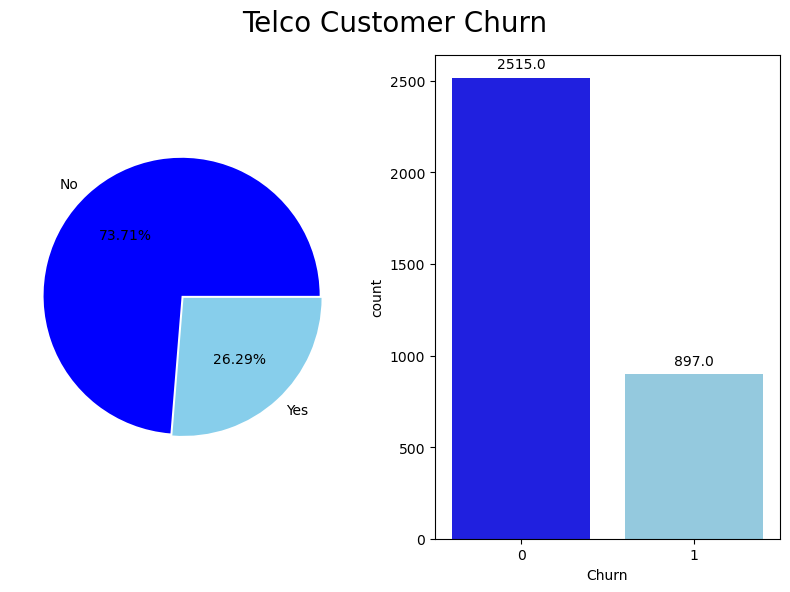

In [29]:
# Color palette for churn and not churn
colors = ['#0000FF', '#87CEEB']  # Blue colors

plt.figure(figsize=(8, 6)).suptitle('Telco Customer Churn', fontsize=20)

# Pie chart
plt.subplot(1, 2, 1)
plt.pie(df_train['Churn'].value_counts(), labels=['No', 'Yes'], colors=colors, autopct='%.2f%%', explode=(0.01, 0.01))

# Bar plot
ax = plt.subplot(1, 2, 2)
sns.countplot(data=df_train, x='Churn', palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

## Outlier

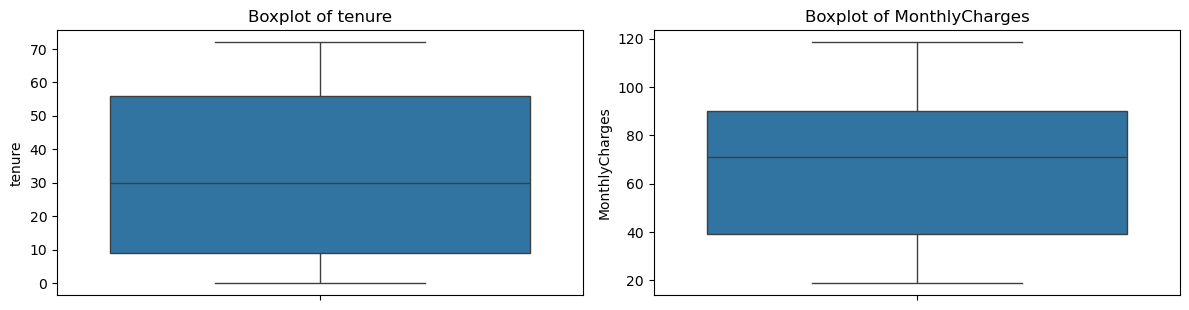

In [30]:
# Memilih kolom numerikal
numerical_columns = ['tenure', 'MonthlyCharges']

plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns, 1):
    # Boxplot
    plt.subplot(2, len(numerical_columns), i)
    sns.boxplot(y=df_train[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [31]:
df_train_Internet = df_train[['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']]

# Karena data pada internet service memiliki kategori DSL dan Fiber Optic maka kita ubah data tersebut menjadi Yes yang akan digunakan nanti untuk melihat anomali
def changeValue(x):
    if x != 'No':
        return x
    else:
        return 'Yes'

df_train_Internet['InternetService'] = df_train_Internet['InternetService'].apply(changeValue)

In [32]:
# Menghitung jumlah layanan yang dimiliki oleh pelanggan
def totalInternetService(row):
    total = 0
    colsSkip = ['InternetService']
    for col in row.index:
        if col not in colsSkip and row[col] != 'Yes':
            total += 1
    return total

df_train_Internet['totalInternetService'] = df_train_Internet.apply(totalInternetService, axis=1)

In [33]:
df_train_Internet[(df_train_Internet['InternetService'] == 'No') & (df_train_Internet['totalInternetService'] >0)]

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,totalInternetService


Setelah kita cek, dapat dipastikan tidak ada anomali pada dataset karena pelanggan tidak memiliki layanan internet mereka tidak akan memiliki layanan yang dipengaruhi oleh hal tersebut.

## Uji Korelasi antar Data Numerikal

In [34]:
num_features = [feature for feature in df_train.columns if ((df_train[feature].dtypes != 'O'))]
num_features

['tenure', 'MonthlyCharges', 'Churn']

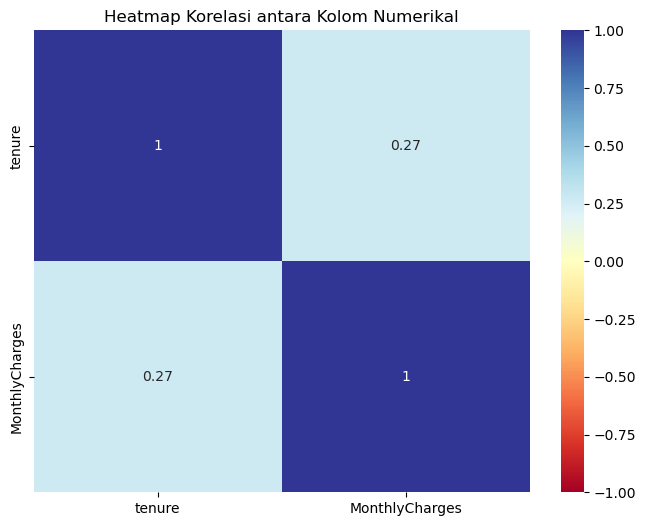

In [35]:
# Menghitung matriks korelasi
correlation_matrix = df_train[numerical_columns].corr(method='spearman')

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara Kolom Numerikal')
plt.show()

Dari Heatmap korelasi diatas menunjukkan bahwa tenure dan MonthlyCharges memiliki korelasi positif lemah sebesar 0.27. Ini berarti bahwa ada hubungan positif yang lemah antara lamanya pelanggan berlangganan (tenure) dan biaya bulanan (MonthlyCharges), di mana peningkatan dalam satu variabel cenderung berhubungan dengan peningkatan dalam variabel lainnya, meskipun korelasinya tidak kuat.

## Korelasi antar Data Kategorikal terhadap Churn

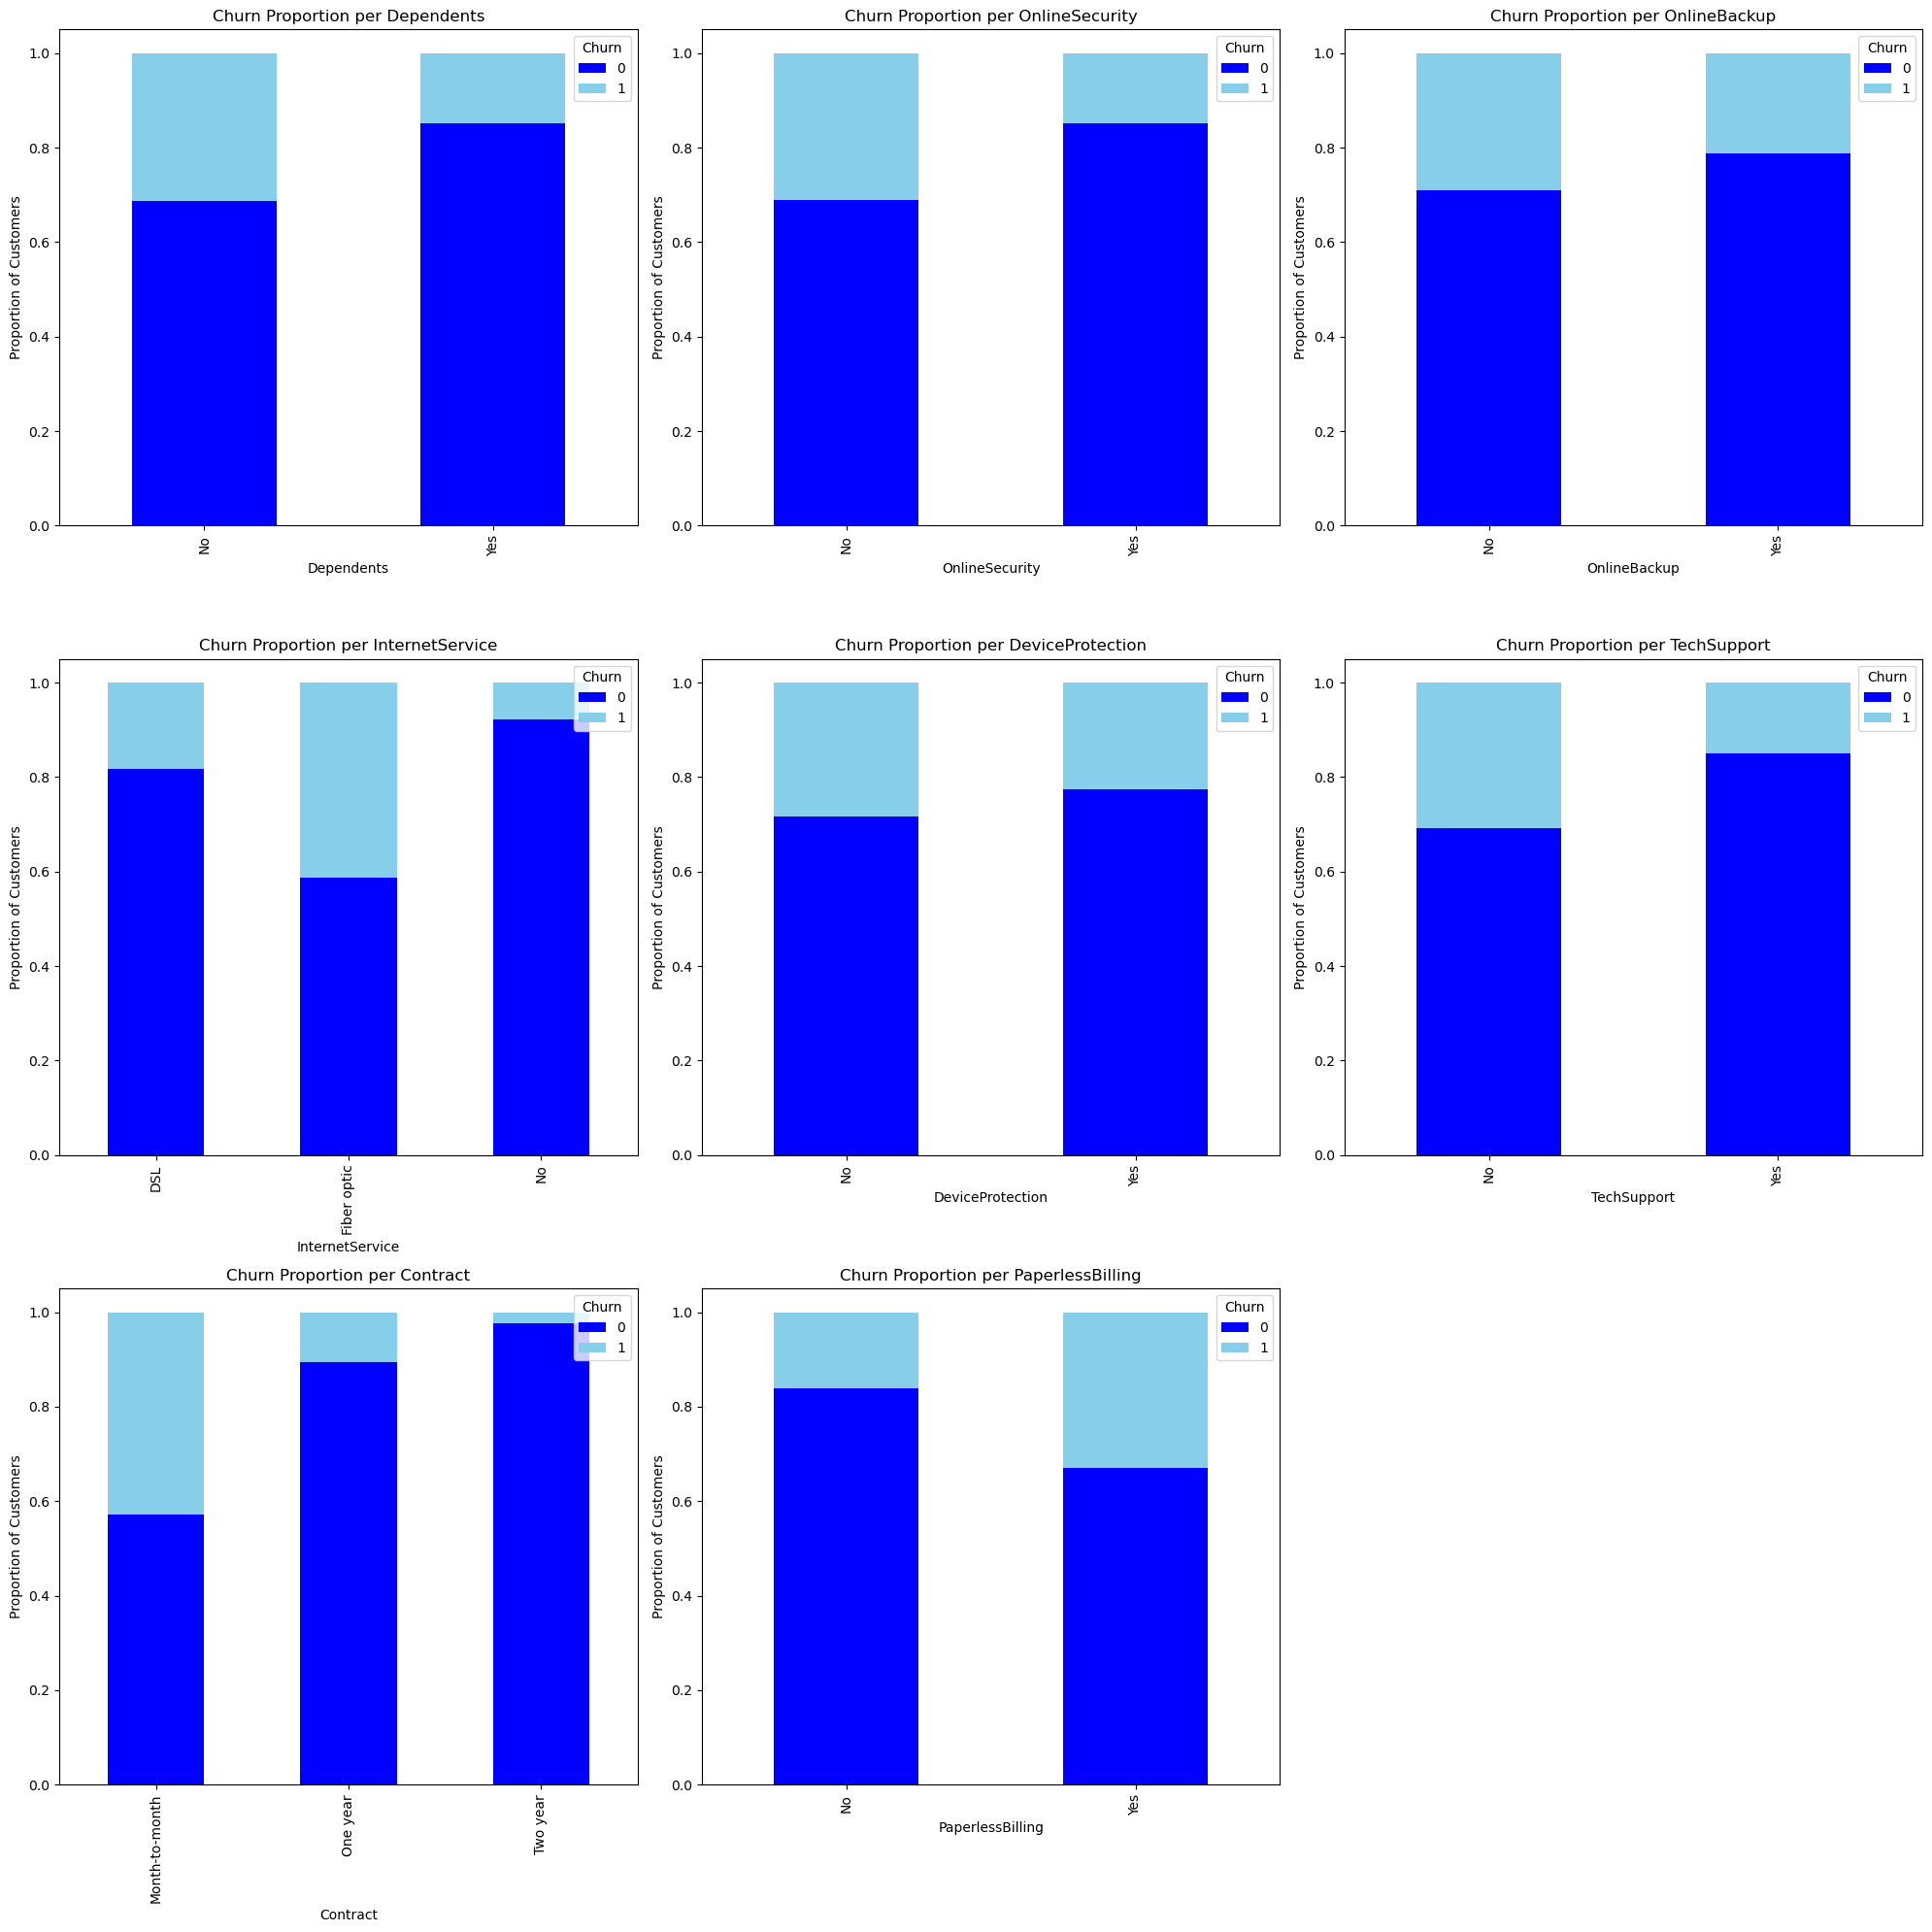

In [36]:
# Define categorical columns
kategorikal_column = ['Dependents', 'OnlineSecurity', 
                      'OnlineBackup', 'InternetService',
                      'DeviceProtection', 'TechSupport',
                      'Contract', 'PaperlessBilling']

# Create a figure
fig = plt.figure(figsize=(20,20))

# Plot Churn Proportion per Attribute
count = 0
for atribut in kategorikal_column:
    count += 1
    ax = plt.subplot(3, 3, count)
    pd.crosstab(df_train[atribut], df_train['Churn'], normalize='index').plot(kind='bar', stacked=True, ax=ax, color=['blue', 'skyblue'])
    plt.title(f'Churn Proportion per {atribut}')
    plt.xlabel(atribut)
    plt.ylabel('Proportion of Customers')
    plt.legend(title='Churn', loc='upper right')

# Adjust layout
fig.tight_layout()

# Show plot
plt.show()


Kesimpulan dari grafik proporsi churn menunjukkan bahwa pelanggan yang tidak memiliki layanan keamanan online (`OnlineSecurity`), pencadangan online (`OnlineBackup`), dukungan teknis (`TechSupport`), atau perlindungan perangkat (`DeviceProtection`) cenderung lebih mungkin untuk churn. Selain itu, pelanggan dengan kontrak jangka pendek atau bulanan (`Month-to-month`) dan mereka yang menggunakan layanan internet Fiber optic juga memiliki proporsi churn yang lebih tinggi. Sebaliknya, pelanggan dengan kontrak jangka panjang (`One year` atau `Two year`) cenderung memiliki proporsi churn yang lebih rendah.

## Kemungkinan Customer yang akan Churn

In [37]:
# Define the tenure bins and labels
tenure_bins = [0, 12, 24, 36, 48, 60, float('inf')]  # Custom bin edges
tenure_labels = ['1y', '2y', '3y', '4y', '5y', '>5y']

# Add a new column for tenure categories
df_train['tenure_category'] = pd.cut(df_train['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)
df_train['tenure_category'].value_counts()

tenure_category
1y     974
>5y    727
2y     502
3y     428
5y     415
4y     366
Name: count, dtype: int64

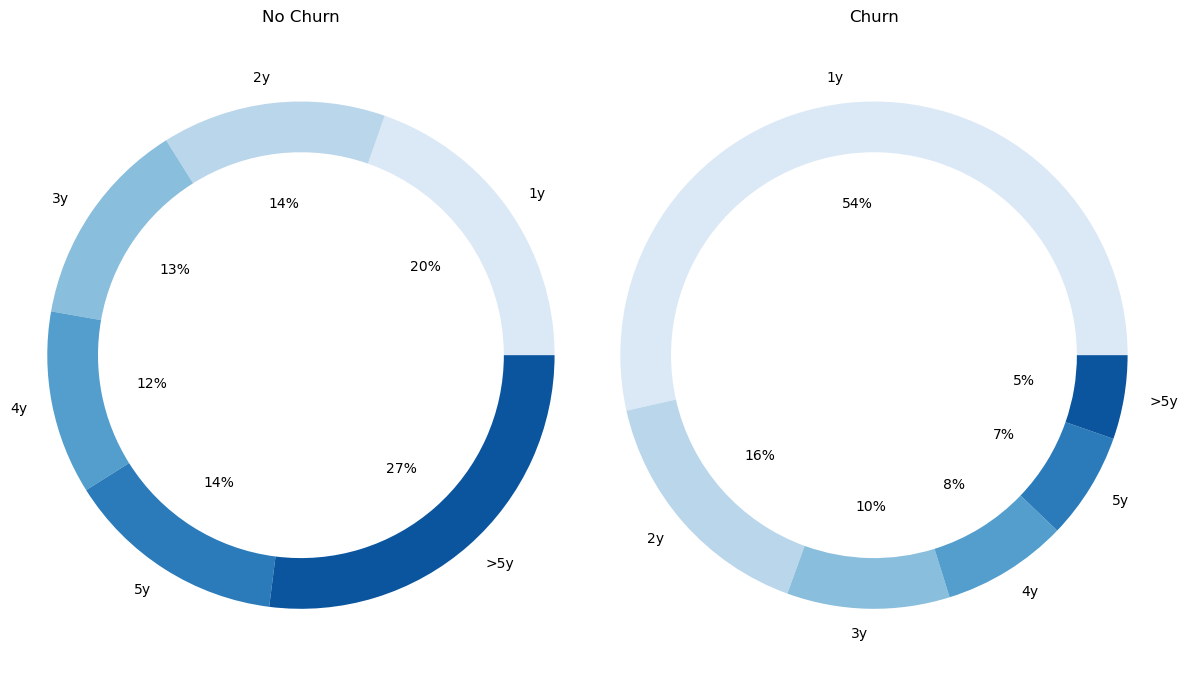

In [38]:
# Hitung jumlah kategori tenure untuk Churn = No dan Churn = Yes
tenure_counts = df_train.groupby(['Churn', 'tenure_category']).size().unstack()

if tenure_counts is not None and not tenure_counts.empty:
    # Buat grid subplot dengan 1 baris dan 2 kolom
    fig, axes = plt.subplots(1, 2, figsize=(12, 7))

    # Definisikan fungsi untuk membuat pie chart
    def plot_pie(ax, data, title):
        ax.pie(
            data,
            labels=data.index,
            autopct='%1.0f%%',
            wedgeprops={'width': 0.2},
            colors=sns.color_palette("Blues")
        )
        ax.set_title(title)
        ax.axis('equal')

    # Plot untuk Churn = No dan Churn = Yes
    if 0 in tenure_counts.index:
        plot_pie(axes[0], tenure_counts.loc[0], 'No Churn')
    else:
        print("No Churn data not available.")
        
    if 1 in tenure_counts.index:
        plot_pie(axes[1], tenure_counts.loc[1], 'Churn')
    else:
        print("Churn data not available.")

    plt.tight_layout()
    plt.show()
else:
    print("Insufficient data to create plots.")

Dapat kita lihat bahwa customer yang akan Churn berasal dari customer yang baru berlanggganan 1 tahun kurang. Maka dari itu dapat kita simpulkan bawah customer baru tidak puas dengan layanan yang kita berikan dan beralih ke provider kompetitor.

In [39]:
# Drop the tenure category feature as it is not needed in the modeling
df_train.drop(columns='tenure_category', inplace=True)

# Preprocessing

## Data Splitting

In [40]:
# define fetures and target
X = df_train.drop(['Churn'], axis = 1)
y = df_train['Churn']

In [41]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2,random_state=10)

In [42]:
df_train.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
4393,Yes,53,Yes,Yes,DSL,No,Yes,One year,No,62.85,0
3736,No,42,No,No,DSL,Yes,Yes,Two year,Yes,78.45,0
1081,No,23,No,No,Fiber optic,No,No,Month-to-month,Yes,74.95,1
120,No,7,No,No,Fiber optic,Yes,No,Month-to-month,Yes,74.90,0
3232,No,2,No,No,Fiber optic,No,No,Month-to-month,No,68.95,1


In [43]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in df_train.columns :
    listItem.append( [col, df_train[col].nunique(), df_train[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[53, 42, 23, 7, 2, 59, 9, 21, 25, 30, 1, 66, 24, 63, 6, 55, 3, 16, 69, 56, 17, 10, 57, 49, 31, 62, 20, 65, 34, 4, 72, 27, 70, 19, 71, 36, 46, 67, 29, 39, 43, 41, 45, 47, 13, 68, 58, 40, 15, 22, 35, 54, 51, 60, 14, 48, 52, 32, 33, 28, 18, 61, 5, 8, 11, 26, 64, 12, 38, 44, 37, 50, 0]"
2,OnlineSecurity,2,"[Yes, No]"
3,OnlineBackup,2,"[Yes, No]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,2,"[No, Yes]"
6,TechSupport,2,"[Yes, No]"
7,Contract,3,"[One year, Two year, Month-to-month]"
8,PaperlessBilling,2,"[No, Yes]"
9,MonthlyCharges,1253,"[62.85, 78.45, 74.95, 74.9, 68.95, 110.15, 20.4, 86.5, 85.9, 106.4, 54.35, 92.15, 20.45, 20.1, 89.4, 45.65, 66.05, 18.8, 80.05, 71.8, 51.4, 24.25, 85.85, 19.35, 45.55, 44.3, 54.65, 39.2, 75.9, 25.05, 25.75, 108.15, 19.7, 107.65, 55.0, 95.45, 94.75, 111.95, 105.1, 19.55, 19.85, 19.5, 60.6, 70.0, 19.8, 80.7, 75.3, 79.2, 105.65, 25.4, 48.95, 50.3, 79.85, 94.1, 99.3, 23.9, 80.25, 99.8, 82.35, 84.35, 100.05, 90.85, 101.4, 96.85, 70.8, 100.55, 20.25, 79.05, 20.5, 112.95, 67.05, 70.75, 84.45, 59.45, 109.65, 101.3, 20.75, 80.0, 19.9, 77.95, 59.65, 45.4, 99.7, 115.8, 81.0, 95.9, 26.1, 104.7, 94.15, 89.9, 69.9, 84.8, 104.3, 79.6, 98.7, 19.95, 78.85, 101.75, 68.75, 64.3, ...]"


## Scalling dan Encoding

In [44]:
# Define ordinal mapping for Contract feature
ordinal_mapping = [{'col':'Contract', 'mapping':{'Month-to-month':0,
                                       'One year':1,
                                       'Two year':2}}]

# Create a transformer
pipe_ordinal_scale = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['Contract'], mapping=ordinal_mapping)),
    ('min_max_scaler', MinMaxScaler())
])

transformer = ColumnTransformer([
    ('min_max_scaler', MinMaxScaler(), ['tenure', 'MonthlyCharges']),
    ('pipe_ordinal_scale', pipe_ordinal_scale, ['Contract']),
    ('onehot', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'InternetService', 'OnlineBackup','DeviceProtection', 'TechSupport', 'PaperlessBilling']),
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('min_max_scaler', MinMaxScaler(),
                                 ['tenure', 'MonthlyCharges']),
                                ('pipe_ordinal_scale',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['Contract'],
                                                                 mapping=[{'col': 'Contract',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Month-to-month    0
One year          1
Two year          2
dtype: int64}])),
                                                 ('min_max_scaler',
                                                  MinMaxScaler())]),
                                 ['Contract']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Dependents', 'OnlineSecurity',
                                  'InternetService', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'PaperlessBilling'])])

In [45]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('min_max_scaler', MinMaxScaler(),
                                 ['tenure', 'MonthlyCharges']),
                                ('pipe_ordinal_scale',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['Contract'],
                                                                 mapping=[{'col': 'Contract',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Month-to-month    0
One year          1
Two year          2
dtype: int64}])),
                                                 ('min_max_scaler',
                                                  MinMaxScaler())]),
                                 ['Contract']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Dependents', 'OnlineSecurity',
                                  'InternetService', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'PaperlessBilling'])])

## Feature Selection

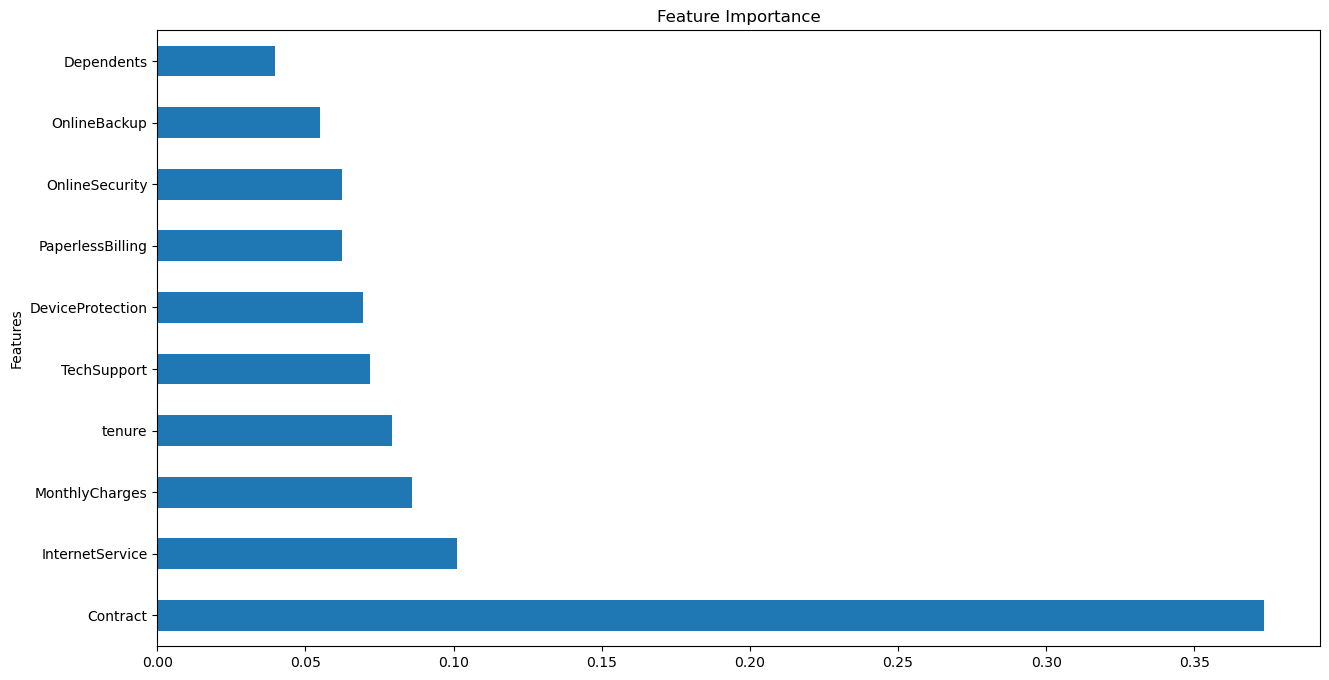

In [46]:
df_train_feat = df_train.drop(columns=['Churn']).copy()
df_train_feat[cat_features] = df_train_feat[cat_features].fillna(value='missing')

# Encode fitur kategorikal
le = LabelEncoder()
df_train_feat[cat_features] = df_train_feat[cat_features].astype('string').apply(le.fit_transform)

# Latih model XGBRegressor
xgb = XGBRegressor()
xgb.fit(df_train_feat, df_train['Churn'])

# Mendapatkan feature importances
xgb_coef1 = pd.Series(xgb.feature_importances_, df_train_feat.columns).sort_values(ascending=False)

# Plot feature importances secara vertikal
plt.figure(figsize=(15, 8))
xgb_coef1.iloc[:50].plot(kind='barh', title='Feature Importance')  # Menggunakan 'barh' untuk plot vertikal
plt.ylabel('Features')
plt.show()

Grafik ini menunjukkan bahwa fitur Contract adalah yang paling berpengaruh dalam memprediksi churn pelanggan, diikuti oleh InternetService dan MonthlyCharges. Jenis kontrak, jenis layanan internet, dan biaya bulanan adalah faktor utama yang memengaruhi apakah pelanggan akan churn.

# Modelling

### Model Benchmarking

In [47]:
# Define models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)

# Define imbalance treatment methods
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
near = NearMiss()

# A dictionary containing models used
models = {
    'KNN': knn,
    'Logistic Regression': logreg,
    'Decision Tree': tree,
    'XGBoost': xgb,
    'Random Forest': rf,
    'Gradient Boosting': gboost,
}

# A dictionary containing resampling method used
resamples = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near miss': near,
}

# A dictionary containing metrics used
metrics = {
    'balanced_accuracy': 'balanced_accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# List to store result
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []
list_resample = []

# Iterate over all models, resampling, and cross-validate method
for name_resample, resample in resamples.items():
    for name_model, model in models.items():
        crossval = StratifiedKFold(n_splits=5)

        if resample is None:
            estimator = ImbPipeline([
                ('preprocessor', transformer),
                ('model', model),
            ])
        else:
            estimator = ImbPipeline([
                ('preprocessor', transformer),
                ('resample', resample),
                ('model', model),
            ])

        list_model.append(name_model)
        list_resample.append(name_resample)
        scores = cross_validate(estimator, X_train, y_train, cv=crossval, scoring=metrics)
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean() * 100)
        test_precision_arr.append(scores['test_precision'].mean() * 100)
        test_recall_arr.append(scores['test_recall'].mean() * 100)
        test_f1_arr.append(scores['test_f1'].mean() * 100)

# Create a dataframe for all of the benchmarking output
model_bench = pd.DataFrame({
    'model': list_model,
    'resample': list_resample,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'F1': test_f1_arr
})

model_bench

,model,resample,accuracy,precision,recall,F1
0,KNN,none,66.008957,55.970902,44.493007,49.464453
1,Logistic Regression,none,70.613056,62.862644,52.308664,57.049074
2,Decision Tree,none,66.911255,50.145305,52.311577,51.152622
3,XGBoost,none,69.220336,59.297230,50.915890,54.746911
4,Random Forest,none,67.738490,58.915904,47.156177,52.266660
5,Gradient Boosting,none,69.278204,63.424180,48.546037,54.927038
6,KNN,ros,69.766884,45.184654,69.455128,54.716354
7,Logistic Regression,ros,75.841127,51.025843,78.668415,61.851682
8,Decision Tree,ros,66.125804,50.257435,49.797009,49.979114
9,XGBoost,ros,70.832083,53.343845,60.401127,56.572442


In [48]:
# Display the top 5 models
top_model = model_bench.sort_values(by='recall', ascending=False).head()
top_model

,model,resample,accuracy,precision,recall,F1
7,Logistic Regression,ros,75.841127,51.025843,78.668415,61.851682
13,Logistic Regression,rus,75.762854,50.861695,78.661616,61.744078
19,Logistic Regression,smote,75.373800,50.650049,77.833139,61.311736
17,Gradient Boosting,rus,74.503091,49.030361,77.833139,60.126266
12,KNN,rus,71.020514,44.827302,75.040793,56.087110


Setelah kita analisa dari model Benchmarking dapat kita simpulkan bahwa `Logistic Regression` merupakan nilai teratas untuk `recall` dengan menggunakan `RandomOverSampling`. Lalu dengan menggunakan metode resampling `RandomOverSampler` dan `RandomUnderSampler` kita akan melakukan test kembali untuk nilai `recall` 3 teratas.

## Perbandingan Model

In [49]:
# Group by model and find the row with the highest recall for each group
top_recall_per_model = model_bench.loc[model_bench.groupby('model')['recall'].idxmax()]

# Sort the results by recall in descending order
top_recall_per_model = top_recall_per_model.sort_values(by='recall', ascending=False)

# Display the results
top_recall_per_model

,model,resample,accuracy,precision,recall,F1
7,Logistic Regression,ros,75.841127,51.025843,78.668415,61.851682
17,Gradient Boosting,rus,74.503091,49.030361,77.833139,60.126266
12,KNN,rus,71.020514,44.827302,75.040793,56.087110
16,Random Forest,rus,73.443535,48.942807,74.620241,59.093218
15,XGBoost,rus,72.670990,47.867402,74.068570,58.136938
14,Decision Tree,rus,68.133035,43.313418,67.926379,52.887612


Secara keseluruhan, penggunaan teknik resampling seperti `RandomOverSampling` dan `RandomUnderSampling` terbukti meningkatkan kemampuan model untuk mendeteksi kelas minoritas, yang diukur melalui nilai recall. `Logistic Regression` dengan `RandomOverSampling` memberikan hasil terbaik dalam nilai recall, diikuti oleh `Gradient Boosting` dengan `RandomUnderSampling`.

## Predict to Data Test

In [50]:
# Define the chosen models
logreg = LogisticRegression(random_state=42)

# Define resampling methods
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)

# List of models
models = [
    ('Logistic Regression', logreg),
]

# List of resampling methods
resamples = [
    ('RandomOverSampling', ros),
    ('RandomUnderSampling', rus),
    ('smote', smote)
]

# List to store results
metrics = []
conf_matrix = []

# Iterate over both models and resampling methods
for name_model, model in models:
    for name_resample, resample in resamples:
        pipeline = ImbPipeline([
            ('transformer', transformer),  # Pastikan transformer sudah didefinisikan sebelumnya
            ('resampling', resample),
            ('model', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        metrics.append([
            f'{name_model} with {name_resample}',
            accuracy_score(y_test, y_pred) * 100,
            precision_score(y_test, y_pred) * 100,
            recall_score(y_test, y_pred) * 100,
            f1_score(y_test, y_pred) * 100
        ])

        conf_matrix.append(confusion_matrix(y_test, y_pred))

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Display the results
metrics_df

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression with RandomOverSampling,72.474378,48.550725,74.444444,58.771930
1,Logistic Regression with RandomUnderSampling,71.888726,47.872340,75.000000,58.441558
2,Logistic Regression with smote,71.888726,47.826087,73.333333,57.894737


In [51]:
# Replace specific model name
metrics_df['Model'] = metrics_df['Model'].replace({
    'Logistic Regression with RandomUnderSampling': 'Logistic Regression Before Tune'
})

# Select the renamed rows
metrics_df_selected = metrics_df[metrics_df['Model'] == 'Logistic Regression Before Tune']

# Display the results

metrics_df_selected

,Model,Accuracy,Precision,Recall,F1
1,Logistic Regression Before Tune,71.888726,47.87234,75.0,58.441558


## Hyperparameter Tuning

In [52]:
# Definisikan Logistic Regression dan RandomUnderSampler
logreg = LogisticRegression(random_state=42)
rus = RandomUnderSampler(random_state=42)

# Buat pipeline dengan RandomUnderSampler dan LogisticRegression
pipe_model = ImbPipeline([
    ('prep', transformer),  
    ('resampling', rus),
    ('model', logreg)
])

# Mendefinisikan Hyperparameter Space untuk LogisticRegression
hyperparam_space = {

    
}

# Definisikan Grid Search
gscv = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

# Fit the Grid Search
gscv.fit(X_train, y_train)

/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_mo

/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_mo

/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_mo

/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_mo

/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_mo

/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_mo

/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `

/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `

/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_mo

/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_mo

/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_mo

/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadsyahirulalim/anaconda3/lib/python3.11/site-packages/sklearn/linear_mo

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('min_max_scaler',
                                                                         MinMaxScaler(),
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('pipe_ordinal_scale',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(cols=['Contract'],
                                                                                                         mapping=[{'col': 'Contract',
                                                                                                                   'data_type': dtype('O'),
                                                                                                                   'mapping': Month-to-month    0
One year          1
Two year          2
dtype: i...
                                                                          'TechSupport',
                                                                          'PaperlessBilling'])])),
                                       ('resampling',
                                        RandomUnderSampler(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__max_iter': [100, 200, 500],
                         'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'model__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                           'sag', 'saga']},
             scoring='recall')

In [75]:
# Output the best parameters and best score
best_params = gscv.best_params_
best_score = gscv.best_score_

print("Best Parameters:", best_params)
print("Best Recall Score:", best_score)

Best Parameters: {'model__C': 0.01, 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'saga'}
Best Recall Score: 0.8912781662781661


In [54]:
logreg_tuning = gscv.best_estimator_
logreg_tuning.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('min_max_scaler',
                                                  MinMaxScaler(),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('pipe_ordinal_scale',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(cols=['Contract'],
                                                                                  mapping=[{'col': 'Contract',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': Month-to-month    0
One year          1
Two year          2
dtype: int64}])),
                                                                  ('min_max_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Contract']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'InternetService',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling'])])),
                ('resampling', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=0.01, penalty='l1', random_state=42,
                                    solver='saga'))])

In [55]:
y_pred_logreg_tuning = logreg_tuning.predict(X_test)

# Accuracy
print(f'Accuracy Score setelah Tuning {round(accuracy_score(y_test, y_pred_logreg_tuning),4)*100}')

# Recall
print(f'Recall Score setelah Tuning {round(recall_score(y_test, y_pred_logreg_tuning),4)*100}')

# Precision
print(f'Precision Score setelah Tuning {round(precision_score(y_test, y_pred_logreg_tuning),4)*100}')

# F1 Score
print(f'F1 Score setelah Tuning {round(f1_score(y_test, y_pred_logreg_tuning),4)*100}')

Accuracy Score setelah Tuning 65.89
Recall Score setelah Tuning 89.44
Precision Score setelah Tuning 42.93
F1 Score setelah Tuning 58.02


In [56]:
accuracy_logreg_tuning = accuracy_score(y_test, y_pred_logreg_tuning) * 100
precision_logreg_tuning = precision_score(y_test, y_pred_logreg_tuning) * 100
recall_logreg_tuning = recall_score(y_test, y_pred_logreg_tuning) * 100
f1_logreg_tuning = f1_score(y_test, y_pred_logreg_tuning) * 100

logreg_after_tuning = pd.DataFrame({
    'Model': ['Logistic Regression After Tuning'],
    'Accuracy': [accuracy_logreg_tuning],
    'Precision': [precision_logreg_tuning],
    'Recall': [recall_logreg_tuning],
    'F1': [f1_logreg_tuning]
})

# Pastikan `metrics_df_selected` memiliki kolom `Model`
metrics_df_selected = metrics_df_selected.reset_index(drop=True)

# Gabungkan dataframe untuk menampilkan hasil
metrics_combined = pd.concat([logreg_after_tuning, metrics_df_selected], ignore_index=True)
metrics_combined

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression After Tuning,65.885798,42.933333,89.444444,58.018018
1,Logistic Regression Before Tune,71.888726,47.872340,75.000000,58.441558


Recall meningkat dari 75.00% sebelum tuning menjadi 89.44% setelah tuning. Ini berarti model setelah tuning lebih efektif dalam mengidentifikasi hampir semua pelanggan yang akan churn, yang penting untuk strategi retensi pelanggan. Meskipun ada trade-off dalam akurasi dan precision, peningkatan recall menunjukkan bahwa model setelah tuning lebih baik dalam menangkap semua kasus churn yang mungkin terjadi.

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

# Memprediksi nilai y pada data tes menggunakan model terbaik dari grid search
y_pred_test = gscv.best_estimator_.predict(X_test)

# Menampilkan classification report
print(classification_report(y_test, y_pred_test))

# Menampilkan confusion matrix
print(confusion_matrix(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.94      0.57      0.71       503
           1       0.43      0.89      0.58       180

    accuracy                           0.66       683
   macro avg       0.68      0.73      0.65       683
weighted avg       0.80      0.66      0.68       683

[[289 214]
 [ 19 161]]


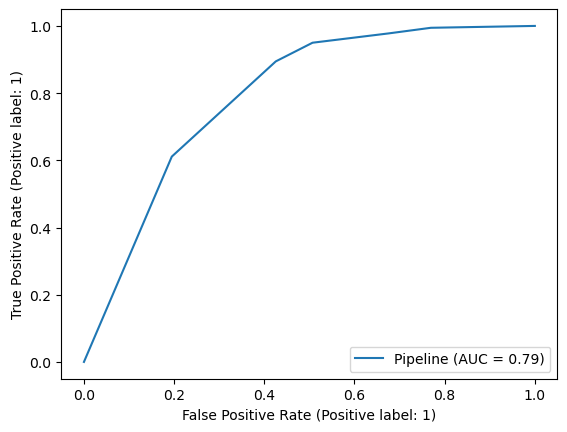

In [58]:
RocCurveDisplay.from_estimator(gscv.best_estimator_,X_test, y_test)

Model Logistic Regression menunjukkan performa yang baik dalam memprediksi churn pelanggan dengan AUC sebesar 0.79. ROC curve menunjukkan bahwa model cukup efektif dalam membedakan antara pelanggan yang akan churn dan yang tidak akan churn. Dengan AUC ini, model dapat digunakan untuk mengidentifikasi pelanggan berisiko tinggi untuk churn, sehingga perusahaan dapat mengambil tindakan preventif untuk mengurangi churn

## Threshold Optimization

In [59]:
model=gscv.best_estimator_
model.fit(X_train,y_train)

th_value=[i/100 for i in range(1,99)]
score=0
score_list=[]

for i in th_value:
    y_prob=model.predict_proba(X_test)[:,1]
    y_pred=np.where(y_prob>i,1,0)
    score_temp=f1_score(y_test,y_pred)
    score_list.append(score_temp)

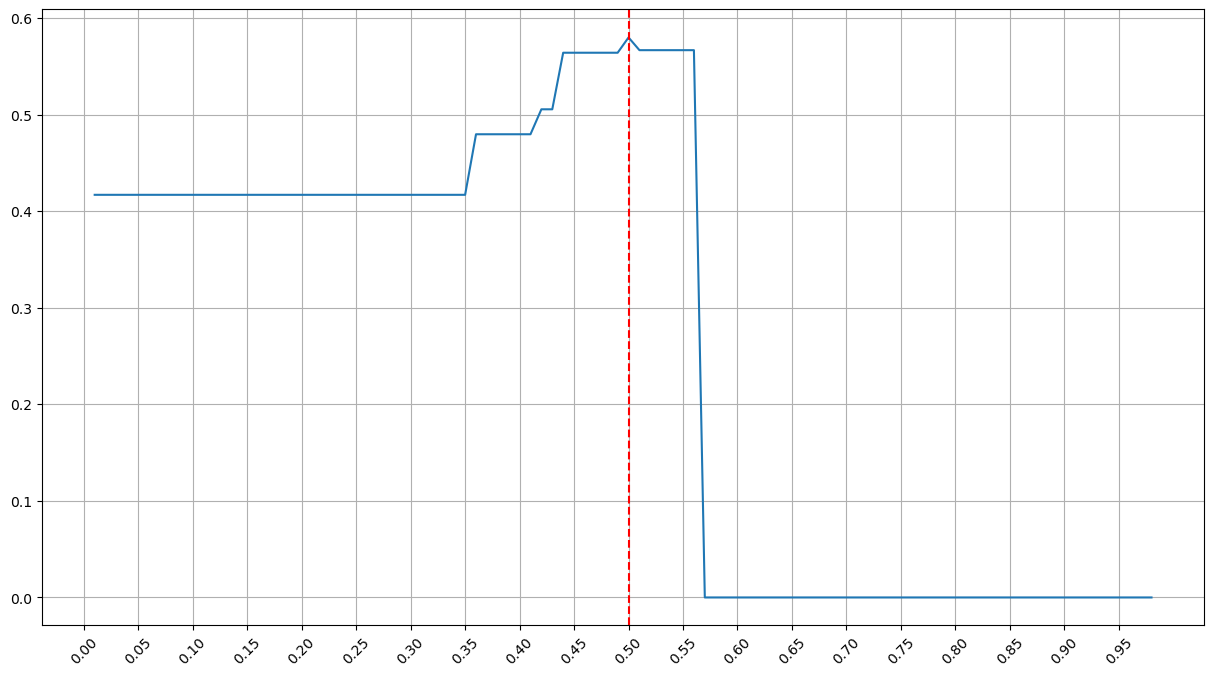

In [60]:
plt.figure(figsize=(15,8))
sns.lineplot(x=th_value,y=score_list)
plt.grid()
plt.xticks(np.arange(0,1,0.05),rotation=45)
plt.axvline(x=0.50, linestyle='--',color='red')
plt.show()

Grafik ini menunjukkan hubungan antara threshold prediksi dan metrik performa model, dengan threshold optimal di sekitar 0.5 yang ditandai oleh garis merah. Pada threshold ini, model mencapai performa terbaik dengan tingkat true positive rate yang tinggi. Kesimpulannya, memilih threshold prediksi di sekitar 0.5 memberikan keseimbangan terbaik antara sensitivitas dan spesifisitas, memungkinkan model untuk lebih efektif mengidentifikasi pelanggan yang mungkin akan churn.

## Change Threshold

In [61]:
y_prob=gscv.best_estimator_.predict_proba(X_test)[:,1]
y_pred=np.where(y_prob>0.36,1,0)

In [62]:
print('recall',recall_score(y_test, y_pred))
print('precision',precision_score(y_test, y_pred))
print('f1 score',f1_score(y_test, y_pred))

recall 0.9944444444444445
precision 0.31625441696113077
f1 score 0.4798927613941019


In [63]:
y_pred_ML=pd.DataFrame(y_pred)
y_pred_ML

,0
0,1
1,1
2,1
3,1
4,1
...,...
678,0
679,1
680,1
681,1


In [64]:
print(classification_report(y_test,y_pred_ML))

              precision    recall  f1-score   support

           0       0.99      0.23      0.37       503
           1       0.32      0.99      0.48       180

    accuracy                           0.43       683
   macro avg       0.65      0.61      0.43       683
weighted avg       0.81      0.43      0.40       683



## Feature Importance

In [65]:
# Define Logistic Regression and RandomUnderSampler
logreg = LogisticRegression(random_state=42)
rus = RandomUnderSampler(random_state=42)

# Create pipeline using imblearn
estimator = ImbPipeline([
    ('prep', transformer),
    ('resample', rus),
    ('model', logreg)
])
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

# Evaluate
recall = recall_score(y_test, y_pred)
print(f'Recall Score sebelum Tuning: {recall}')


Recall Score sebelum Tuning: 0.75


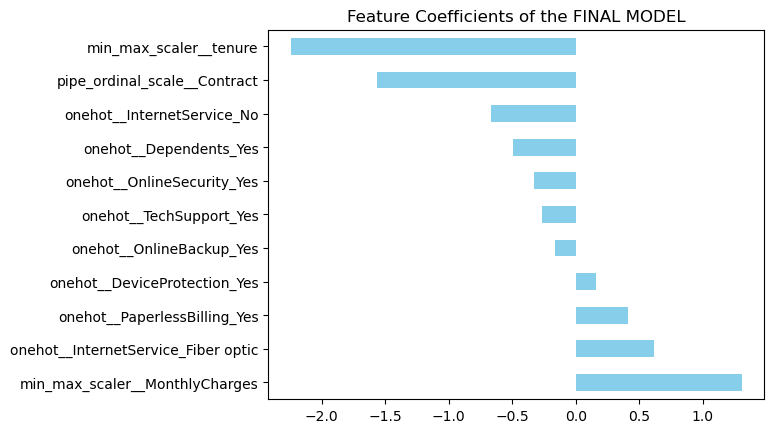

In [66]:
# Assuming logreg_tuning['model'] is your trained Logistic Regression model
coef = pd.Series(estimator['model'].coef_[0], transformer.get_feature_names_out()).sort_values(ascending = False)
coef.plot(kind='barh', title='Feature Coefficients of the FINAL MODEL', color='skyblue');

### Kesimpulan Berdasarkan Koefisien Fitur Logistic Regression

Dari grafik koefisien fitur model Logistic Regression yang ditampilkan, kita dapat melihat beberapa fitur yang memiliki pengaruh signifikan terhadap prediksi churn pelanggan. Berikut adalah kesimpulan singkat berdasarkan hasil tersebut:

1. `Tenure`:

- Fitur `tenure` (lamanya pelanggan berlangganan) memiliki koefisien negatif terbesar, yang berarti semakin lama pelanggan berlangganan, semakin kecil kemungkinan mereka akan churn.

2. `Contract`:

- Fitur `Contract` memiliki koefisien negatif yang signifikan, yang menunjukkan bahwa jenis kontrak yang lebih panjang (misalnya, kontrak dua tahun) mengurangi kemungkinan churn.

3. `InternetService`:

Pelanggan tanpa layanan internet (`InternetService_No`) cenderung lebih kecil kemungkinan untuk churn dibandingkan mereka yang memiliki layanan internet. Namun, pelanggan dengan `Fiber optic` layanan internet memiliki sedikit pengaruh positif terhadap churn.

4. `Dependents`:

Pelanggan dengan tanggungan (`Dependents_Yes`) memiliki kemungkinan lebih kecil untuk churn dibandingkan mereka yang tidak memiliki tanggungan.

5. OnlineSecurity, TechSupport, dan OnlineBackup:

Fitur-fitur ini menunjukkan bahwa pelanggan yang menggunakan layanan keamanan online (`OnlineSecurity_Yes`), dukungan teknis (`TechSupport_Yes`), dan pencadangan online (`OnlineBackup_Yes`) memiliki kemungkinan lebih kecil untuk churn.

6. `DeviceProtection` dan `PaperlessBilling`:

Pelanggan yang menggunakan perlindungan perangkat (`DeviceProtection_Yes`) dan penagihan tanpa kertas (`PaperlessBilling_Yes`) juga memiliki pengaruh negatif terhadap churn, namun pengaruhnya tidak sebesar fitur lainnya.

7. `MonthlyCharges`:

Fitur `MonthlyCharges` menunjukkan bahwa semakin tinggi biaya bulanan, semakin besar kemungkinan pelanggan akan churn. Ini adalah satu-satunya fitur numerik selain tenure yang memiliki pengaruh signifikan.

Kesimpulan:

Model menunjukkan bahwa fitur seperti lamanya berlangganan (`tenure`), jenis kontrak (`Contract`), dan penggunaan layanan tambahan seperti keamanan online (`OnlineSecurity`), dukungan teknis (`TechSupport`), dan pencadangan online (`OnlineBackup`) adalah indikator penting dalam menentukan apakah pelanggan akan churn. Fitur-fitur ini memberikan wawasan berharga tentang perilaku pelanggan dan dapat digunakan untuk strategi retensi pelanggan yang lebih baik.

## Model Limitation

In [67]:
df.columns

Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'Churn'],
      dtype='object')

1. ##### Encoding Fitur Kategorikal dan Biner:

- `Kategorikal`: Fitur seperti `Dependents`, `OnlineSecurity`, `OnlineBackup`, `InternetService`, `DeviceProtection`, `TechSupport`, `Contract`, dan `PaperlessBilling` adalah fitur kategorikal dengan sedikit nilai unik. Untuk model machine learning, nilai-nilai ini harus diubah menjadi format numerik menggunakan teknik seperti One-Hot Encoding atau Label Encoding.
- `Biner`: Fitur biner seperti `Dependents`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `PaperlessBilling`, dan `Churn` (dengan nilai `Yes` dan `No`) dapat dengan mudah diubah menjadi 0 dan 1.

2. ##### Scaling Fitur Numerik:

- Fitur numerik seperti `tenure` dan `MonthlyCharges` memiliki banyak nilai unik dan memerlukan scaling untuk memastikan semua fitur berada dalam rentang yang sama, yang penting untuk beberapa model machine learning `Logistic Regression`.

3. ##### Rentang Nilai:

- `Tenure`: 0-73 bulan
- `MonthlyCharges`: 18.8-118.65
- Jika ada nilai di luar rentang ini, mereka dapat mempengaruhi performa model. Perlu dipastikan bahwa semua nilai berada dalam rentang yang diharapkan.

4. ##### Data Imbalance untuk kolom Churn:

- Saat ini data imbalance disiasati dengan menggunakan metode resampling `RandomOverSampling`,`RandomUnderSampling`,`SMOTE`, dan `NearMiss` agar dapat mengatasi ketidakseimbangan data

# Recommendation and Conclusion

In [69]:
# Menampilkan classification report
print('Logistic Regression')
print(classification_report(y_test, y_pred_test))

Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.57      0.71       503
           1       0.43      0.89      0.58       180

    accuracy                           0.66       683
   macro avg       0.68      0.73      0.65       683
weighted avg       0.80      0.66      0.68       683



## Conclusion

- `Pelanggan Churn`: Model menunjukkan recall tinggi (`0.89`) dalam mendeteksi pelanggan yang akan churn, artinya model sangat efektif dalam mengidentifikasi sebagian besar pelanggan yang berpotensi churn, meskipun precision-nya rendah (`0.43`), yang menunjukkan bahwa ada cukup banyak false positives.

- `Pelanggan Tidak Churn`: Model memiliki precision tinggi (`0.94`) dalam mendeteksi pelanggan yang tidak akan churn, menunjukkan bahwa sebagian besar prediksi untuk tidak churn akurat. Namun, recall yang lebih rendah (`0.57`) menunjukkan bahwa model gagal menangkap banyak pelanggan yang sebenarnya tidak churn, menyebabkan sejumlah false negatives.

Secara keseluruhan, model lebih efektif dalam mendeteksi pelanggan yang akan churn, yang sangat penting untuk strategi retensi. Namun, ada trade-off dengan precision yang lebih rendah untuk prediksi churn, yang berarti beberapa pelanggan yang diprediksi akan churn sebenarnya tidak churn.

## Recommendation

1. `Fokus pada Pelanggan Berisiko Tinggi`:

- Manfaatkan model untuk mengidentifikasi pelanggan yang berisiko tinggi untuk churn dan segera ambil tindakan proaktif. Berikan penawaran khusus, diskon, atau program loyalitas untuk pelanggan ini guna meningkatkan retensi mereka.

2. `Meningkatkan Precision untuk Prediksi Churn`:

- Untuk mengurangi jumlah false positives, pertimbangkan untuk menggunakan model tambahan atau teknik ensemble. Kombinasi Logistic Regression dengan model lain seperti Random Forest atau Gradient Boosting dapat meningkatkan precision dan memberikan prediksi yang lebih akurat.

3. `Analisis Pelanggan Tidak Churn`:

- Lakukan analisis mendalam terhadap pelanggan yang diprediksi tidak churn tetapi sebenarnya churn (false negatives). Identifikasi pola atau fitur yang mungkin diabaikan oleh model untuk meningkatkan akurasi prediksi di masa depan.

4. `Pengoptimalan Threshold`:

- Eksperimen dengan berbagai threshold untuk prediksi churn. Menurunkan threshold dapat meningkatkan recall, sedangkan menaikkan threshold dapat meningkatkan precision. Pilih threshold yang sesuai dengan tujuan bisnis dan kebutuhan perusahaan.

5. `Edukasi dan Pelatihan Tim Layanan Pelanggan`:

- Berikan informasi kepada tim layanan pelanggan tentang hasil model dan strategi retensi yang diusulkan. Pelatihan khusus untuk menangani pelanggan yang berisiko tinggi dapat meningkatkan efektivitas intervensi dan meningkatkan kepuasan pelanggan.

6. `Pemantauan dan Pembaruan Model`:

- Pantau kinerja model secara berkala dan lakukan pembaruan dengan data terbaru untuk mempertahankan atau meningkatkan akurasi dan efektivitas model. Ini penting agar model tetap relevan dengan perubahan tren dan perilaku pelanggan.

7. `Meningkatkan Layanan Tambahan`:

- Pertimbangkan untuk meningkatkan layanan tambahan seperti keamanan online, dukungan teknis, dan pencadangan online, yang telah terbukti berpengaruh terhadap churn. Menawarkan layanan-layanan ini dengan harga yang lebih kompetitif atau sebagai bagian dari paket dapat meningkatkan retensi pelanggan.

Dengan menerapkan rekomendasi ini, perusahaan dapat lebih efektif dalam mengelola churn pelanggan dan meningkatkan kepuasan serta retensi pelanggan secara keseluruhan.